# POVERTY SOMETHING

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import Maritza

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

First we show what we do with the first set of data, then we do the same for all the other datasets, the only difference is the age-range considered. We do this to enable us to later merge the data with the different age-range specified

In [22]:
filename = r'C:\Users\PC\Dropbox\0. Personal\000. Maestría\0. University of Copenhagen - MSc Economics\Courses\6. Introduction Programming\projects-2024-petra-maritza-noah\dataproject\relative_Poverty.xlsx'
rp_tot = pd.read_excel(filename, sheet_name= 'Age-total')
rp_tot 

,Location,2015,2016,2017,2018,2019,2020,2021,2022
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [11]:
# Rename columns by specifying a function
# Lambda function to modify the column names
# rp_tot.columns = rp_tot.columns.map(lambda x: x + '_rp_tot' if x.isdigit() else x)
# rp_tot
rp_tot.columns = rp_tot.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_rp_tot' if x.isdigit() else x)
rp_tot

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [12]:
#Here we import all the datasets on relative poverty, but considering the data for different age ranges
rp_17 = pd.read_excel(filename, sheet_name= '0-17')
rp_29 = pd.read_excel(filename, sheet_name= '18-29')
rp_39 = pd.read_excel(filename, sheet_name= '30-39')
rp_49 = pd.read_excel(filename, sheet_name= '40-49')
rp_59 = pd.read_excel(filename, sheet_name= '50-59')
rp_69 = pd.read_excel(filename, sheet_name= '60-69')
rp_79 = pd.read_excel(filename, sheet_name= '70-79')
rp_80 = pd.read_excel(filename, sheet_name= '80-onwards')

In [13]:
def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
rp_17 = rename_columns(rp_17, '_rp_17')
rp_29 = rename_columns(rp_29, '_rp_29')
rp_39 = rename_columns(rp_39, '_rp_39')
rp_49 = rename_columns(rp_49, '_rp_49')
rp_59 = rename_columns(rp_59, '_rp_59')
rp_69 = rename_columns(rp_69, '_rp_69')
rp_79 = rename_columns(rp_79, '_rp_79')
rp_80 = rename_columns(rp_80, '_rp_80')

rp_17

,location,2015_rp_17,2016_rp_17,2017_rp_17,2018_rp_17,2019_rp_17,2020_rp_17,2021_rp_17,2022_rp_17
0,All Denmark,3.8,4.6,5.6,5.4,5.3,5.0,4.7,4.2
1,Capital municipalities,3.9,4.3,5.2,5.0,5.0,4.8,4.5,4.0
2,Metropolitan municipalities,4.1,4.8,6.3,6.1,6.3,5.8,5.7,5.1
3,Provincial municipalities,3.5,4.3,5.3,5.1,4.9,4.7,4.5,3.9
4,Commuter municipalities,3.0,3.9,4.9,4.6,4.6,4.2,4.0,3.6
...,...,...,...,...,...,...,...,...,...
99,Morsø,5.7,7.5,8.1,6.5,5.9,5.1,6.5,4.7
100,Rebild,2.1,2.2,3.2,3.4,3.2,3.3,2.4,2.3
101,Thisted,4.5,5.0,6.0,6.2,5.6,5.6,4.9,3.9
102,Vesthimmerlands,5.6,6.0,6.2,6.0,5.9,5.5,4.9,4.3


In [14]:
#Here we compute the same operations but using the Net Wealth dataset instead:

filename2 = r'C:\Users\PC\Dropbox\0. Personal\000. Maestría\0. University of Copenhagen - MSc Economics\Courses\6. Introduction Programming\projects-2024-petra-maritza-noah\dataproject\net_wealth.xlsx'
nw_18_over = pd.read_excel(filename2, sheet_name= '18-over')

#Renaming columns
nw_18_over.columns = nw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nw_29 = rename_columns(nw_29, '_nw_29')
nw_39 = rename_columns(nw_39, '_nw_39')
nw_49 = rename_columns(nw_49, '_nw_49')
nw_59 = rename_columns(nw_59, '_nw_59')
nw_69 = rename_columns(nw_69, '_nw_69')
nw_79 = rename_columns(nw_79, '_nw_79')
nw_80 = rename_columns(nw_80, '_nw_80')

In [15]:
#Here we compute the same operations but using the Negative Net Dataset instead:
filename3 = r'C:\Users\PC\Dropbox\0. Personal\000. Maestría\0. University of Copenhagen - MSc Economics\Courses\6. Introduction Programming\projects-2024-petra-maritza-noah\dataproject\neg_net_wealth.xlsx'
nnw_18_over = pd.read_excel(filename3, sheet_name= '18-over')

#Renaming columns
nnw_18_over.columns = nnw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nnw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nnw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nnw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nnw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nnw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nnw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nnw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nnw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nnw_29 = rename_columns(nnw_29, '_nnw_29')
nnw_39 = rename_columns(nnw_39, '_nnw_39')
nnw_49 = rename_columns(nnw_49, '_nnw_49')
nnw_59 = rename_columns(nnw_59, '_nnw_59')
nnw_69 = rename_columns(nnw_69, '_nnw_69')
nnw_79 = rename_columns(nnw_79, '_nnw_79')
nnw_80 = rename_columns(nnw_80, '_nnw_80')

# Merge Datasets

Here we combine our datasets on relative poverty, in order to have just one with all the different age ranges specified

In [16]:
datasets = [rp_17, rp_29, rp_39, rp_49, rp_59, rp_69, rp_79, rp_80]

# Initialize the merged dataset with the first dataset
merged_rp = rp_tot

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_rp = merged_rp.merge(dataset, on='location')

# Print the merged dataset
merged_rp

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot,2015_rp_17,...,2021_rp_79,2022_rp_79,2015_rp_80,2016_rp_80,2017_rp_80,2018_rp_80,2019_rp_80,2020_rp_80,2021_rp_80,2022_rp_80
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7,3.8,...,0.8,0.7,0.7,0.7,0.7,0.7,0.7,0.8,1.0,0.8
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0,3.9,...,1.1,0.9,1.0,0.9,1.0,0.9,0.9,1.0,1.3,1.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6,4.1,...,0.8,0.6,0.9,0.8,0.9,0.7,0.9,0.8,1.2,0.9
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5,3.5,...,0.7,0.6,0.6,0.6,0.7,0.6,0.7,0.7,0.9,0.7
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9,3.0,...,0.6,0.5,0.7,0.6,0.6,0.6,0.6,0.7,0.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1,5.7,...,1.0,0.4,0.4,0.3,0.4,0.4,0.8,0.2,0.8,0.4
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9,2.1,...,0.7,0.4,0.2,0.4,0.4,0.3,0.2,0.8,0.7,0.6
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2,4.5,...,0.7,0.7,0.4,0.4,0.5,0.5,0.5,0.7,0.9,0.6
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3,5.6,...,0.8,0.5,0.3,0.4,0.2,0.5,0.6,1.0,0.7,0.6


In [17]:
#Merging datasets on net wealth:
datasets = [nw_29, nw_39, nw_49, nw_59, nw_69, nw_79, nw_80]

# Initialize the merged dataset with the first dataset
merged_nw = nw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nw = merged_nw.merge(dataset, on='location')


In [19]:
#Merging datasets on negative net wealth
datasets = [nnw_29, nnw_39, nnw_49, nnw_59, nnw_69, nnw_79, nnw_80]

# Initialize the merged dataset with the first dataset
merged_nnw = nnw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nnw = merged_nnw.merge(dataset, on='location')

merged_nnw

,location,2014_nnw_18_over,2015_nnw_18_over,2016_nnw_18_over,2017_nnw_18_over,2018_nnw_18_over,2019_nnw_18_over,2020_nnw_18_over,2021_nnw_18_over,2022_nnw_18_over,...,2022_nnw_79,2014_nnw_80,2015_nnw_80,2016_nnw_80,2017_nnw_80,2018_nnw_80,2019_nnw_80,2020_nnw_80,2021_nnw_80,2022_nnw_80
0,All Denmark,12.0,11.3,10.7,9.9,9.7,9.0,9.7,9.4,9.6,...,1520929,648413,672649,697826,736633,766356,808149,845385,920742,940050
1,Capital municipalities,10.5,9.9,9.4,8.9,8.9,8.4,9.3,9.3,9.4,...,2099157,814068,863468,911708,971776,1013982,1087798,1155454,1273427,1315086
2,Metropolitan municipalities,13.7,13.0,12.5,11.6,11.5,10.9,11.2,10.9,11.0,...,1663841,639565,673838,709351,761071,811235,860951,896564,973515,998729
3,Provincial municipalities,12.1,11.3,10.7,9.8,9.6,8.9,9.6,9.4,9.6,...,1471643,636139,660681,684158,720911,746390,792604,831236,899056,919090
4,Commuter municipalities,11.9,10.9,10.2,9.2,8.8,8.0,8.8,8.4,8.6,...,1520070,660809,676931,705964,750415,779973,819805,857582,938813,950745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,11.6,10.6,10.5,9.8,9.8,9.8,9.9,9.4,8.8,...,1140245,526975,583032,574841,608875,610089,633435,659651,718213,755686
100,Rebild,11.3,11.0,9.9,9.5,8.8,8.8,9.6,9.1,9.3,...,1489972,776646,743555,780614,801784,870791,886305,877149,922561,921536
101,Thisted,12.4,11.9,11.6,10.5,10.6,9.8,9.7,9.2,9.2,...,1223738,586715,616287,634118,668981,674757,718238,749098,802818,797500
102,Vesthimmerlands,12.5,12.2,11.2,10.2,10.2,9.4,10.1,10.0,9.4,...,1241721,592607,581605,624418,639834,627717,673381,673327,723523,733795


In [141]:
# For explanatory reasons:
# We now have three datasets:

# merged_rp: which contains all the data on relative-poverty divided also by age ranges
# merged_nw: which contains all the data on net wealth divided also by age ranges
# merged_nnw: which contains all the data on negative net wealth divided also by age ranges

# Descriptive statistics

ValueError: x and y must have same first dimension, but have shapes (8,) and (104,)

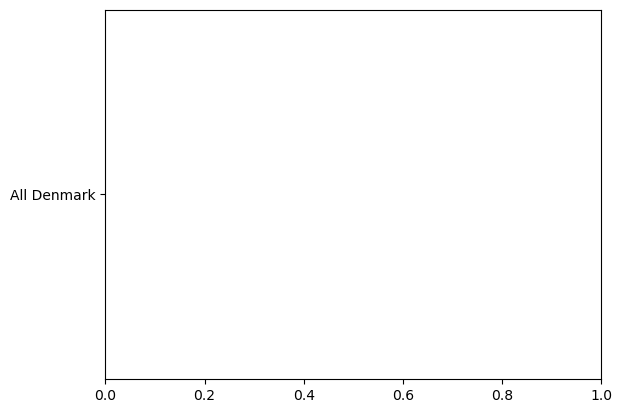

In [29]:
df = merged_rp

# Define the years and the corresponding columns in the dataframe
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
data_to_plot = df['Location']

# Calculate the mean of the year-rate per year and region in Denmark
#rate_age = rate_age_year[data_to_plot].mean()

def create_chart(year):
    # Filter the data to only include the selected year and drop the row with the "Unknown municipality" value
    year_data = criminality_year[['municipalities', f'crim_{year}']].drop(criminality_year.index[criminality_year['municipalities'] == 'Unknown municipality'])
    
    # Calculate the total crimes for the year
    total_crimes = year_data[f'crim_{year}'].sum()
    
    # Calculate the proportional area for each municipality
    year_data['area'] = year_data[f'crim_{year}']/total_crimes
    
    # Sort the data by crime in descending order
    year_data = year_data.sort_values(by=f'crim_{year}', ascending=False)
    
    # Get the top 50 municipalities by crime
    top_municipalities = year_data.iloc[:50, :]

# Create the line graph with red points
plt.plot(years, data_to_plot, marker='o', linestyle='-', color='black', markersize=4, markerfacecolor='red') 

# Format the x-axis tick labels as integers
plt.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Add a title and axis labels
plt.set_title('Mean of rate-age')
plt.set_xlabel('Year')
plt.set_ylabel('Mean of rate-age')

# Add a note about criminality
#fig.text(0.5, -0.1, 'Criminality includes all offences under the Danish criminal code but not those under the Danish traffic law.', ha='center')

plt.show()

# Analysis

# Conclusion